# Preparation

In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# pip install graphviz

# Read Data

In [3]:
df = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24.xlsx", sheet_name="Sumber Data")
df = df.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK3,NIK4,NIK5,NIK6,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,79063,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,13,...,dzikr,NaN,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,dzikr,NaN,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,2100.0,NaN,0,...,dzikr,NaN,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,dzikr,NaN,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Mesin           1834 non-null   int64         
 1   KodePekerjaan   1834 non-null   int64         
 2   NoOrder         1834 non-null   int64         
 3   Judul           1834 non-null   object        
 4   NoKatern1       1834 non-null   object        
 5   NoKatern2       1825 non-null   object        
 6   Warna           1834 non-null   int64         
 7   Teller          215 non-null    float64       
 8   HasilRusak      0 non-null      float64       
 9   compute_0014    1834 non-null   object        
 10  NamaMesin       1834 non-null   object        
 11  NamaPekerjaan   1834 non-null   object        
 12  compute_0017    0 non-null      float64       
 13  compute_0018    0 non-null      float64       
 14  compute_0019    0 non-null      float64       
 15  comp

In [5]:
df['TanggalJamMulai'] = df['TanggalMulai'].astype(str) + ' ' + df['JamMulai']
df['TanggalJamSelesai'] = df['TanggalSelesai'].astype(str) + ' ' + df['JamSelesai']

df

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK5,NIK6,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,13,...,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,2100.0,NaN,0,...,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24


In [6]:
df['TanggalJamMulai'] = pd.to_datetime(df['TanggalJamMulai'])
df['TanggalJamSelesai'] = pd.to_datetime(df['TanggalJamSelesai'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Judul              1834 non-null   object        
 4   NoKatern1          1834 non-null   object        
 5   NoKatern2          1825 non-null   object        
 6   Warna              1834 non-null   int64         
 7   Teller             215 non-null    float64       
 8   HasilRusak         0 non-null      float64       
 9   compute_0014       1834 non-null   object        
 10  NamaMesin          1834 non-null   object        
 11  NamaPekerjaan      1834 non-null   object        
 12  compute_0017       0 non-null      float64       
 13  compute_0018       0 non-null      float64       
 14  compute_

# Cleaning Data

## Label Encoding

In [7]:
df_new = df

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df_new['Judul'])

df_new.drop('Judul', axis=1, inplace=True)
df_new['Judul'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern1'])

df_new.drop('NoKatern1', axis=1, inplace=True)
df_new['NoKatern1'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern2'])

df_new.drop('NoKatern2', axis=1, inplace=True)
df_new['NoKatern2'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaPekerjaan'])

df_new.drop('NamaPekerjaan', axis=1, inplace=True)
df_new['NamaPekerjaan'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaMesin'])

df_new.drop('NamaMesin', axis=1, inplace=True)
df_new['NamaMesin'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['Keterangan'])

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Warna              1834 non-null   int64         
 4   Teller             215 non-null    float64       
 5   HasilRusak         0 non-null      float64       
 6   compute_0014       1834 non-null   object        
 7   compute_0017       0 non-null      float64       
 8   compute_0018       0 non-null      float64       
 9   compute_0019       0 non-null      float64       
 10  compute_0020       0 non-null      float64       
 11  compute_0021       0 non-null      float64       
 12  compute_0022       0 non-null      float64       
 13  compute_0023       0 non-null      float64       
 14  compute_

In [10]:
# df_new = df.select_dtypes(exclude=['object'])
# # df_date_selesai = df_date_selesai.drop(columns = ['KodePekerjaan','NoOrder','Mesin','NIK2','TanggalJamMulai1','Produksi','compute_0026','compute_0027'])
# df_new

## Drop Unused Columns

In [11]:
df_new = df_new.drop(columns = ['HasilRusak','NIK4','NIK5','NIK6','Unnamed: 40','Unnamed: 43','Unnamed: 44','ket 2','NIK1',
                                'NIK2','NIK3','NIK4','NIK5','NIK6','Teller','TanggalJamMulai','TanggalJamSelesai',
                                'TanggalSelesai','TanggalMulai','KodePekerjaan','NoOrder','Produksi','Keterangan'])
df_new = df_new.select_dtypes(exclude=['object'])
df_new.fillna(0,inplace=True)

In [12]:
df_new.isna().sum()

Mesin            0
Warna            0
compute_0017     0
compute_0018     0
compute_0019     0
compute_0020     0
compute_0021     0
compute_0022     0
compute_0023     0
compute_0024     0
compute_0026     0
compute_0027     0
compute_0028     0
compute_0029     0
Shift            0
Oplah            0
Trax             0
\                0
Judul            0
NoKatern1        0
NoKatern2        0
NamaPekerjaan    0
NamaMesin        0
dtype: int64

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mesin          1834 non-null   int64  
 1   Warna          1834 non-null   int64  
 2   compute_0017   1834 non-null   float64
 3   compute_0018   1834 non-null   float64
 4   compute_0019   1834 non-null   float64
 5   compute_0020   1834 non-null   float64
 6   compute_0021   1834 non-null   float64
 7   compute_0022   1834 non-null   float64
 8   compute_0023   1834 non-null   float64
 9   compute_0024   1834 non-null   float64
 10  compute_0026   1834 non-null   int64  
 11  compute_0027   1834 non-null   int64  
 12  compute_0028   1834 non-null   float64
 13  compute_0029   1834 non-null   float64
 14  Shift          1834 non-null   int64  
 15  Oplah          1834 non-null   int64  
 16  Trax           1834 non-null   int64  
 17  \              1834 non-null   float64
 18  Judul   

In [14]:
# plt.figure(figsize=(14,6))
# sns.boxplot(x='Warna', y='Oplah',hue='Warna',data=df_new,palette='rainbow')
# plt.title('Box plot of charges vs children');

# Modelling

In [15]:
X = df_new.drop('Judul', axis=1)
y = df_new['Judul']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# X_train.info()
# # X_train = X_train.drop(columns = ['TanggalJamSelesai']

## Random Forest

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 864 to 1548
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mesin          1283 non-null   int64  
 1   Warna          1283 non-null   int64  
 2   compute_0017   1283 non-null   float64
 3   compute_0018   1283 non-null   float64
 4   compute_0019   1283 non-null   float64
 5   compute_0020   1283 non-null   float64
 6   compute_0021   1283 non-null   float64
 7   compute_0022   1283 non-null   float64
 8   compute_0023   1283 non-null   float64
 9   compute_0024   1283 non-null   float64
 10  compute_0026   1283 non-null   int64  
 11  compute_0027   1283 non-null   int64  
 12  compute_0028   1283 non-null   float64
 13  compute_0029   1283 non-null   float64
 14  Shift          1283 non-null   int64  
 15  Oplah          1283 non-null   int64  
 16  Trax           1283 non-null   int64  
 17  \              1283 non-null   float64
 18  NoKatern1  

In [18]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = rf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.985480943738657


In [21]:
# conda install python-graphviz


In [22]:
# pip install --upgrade sklearn
# import sklearn
# print(sklearn.__version__)

In [23]:
# !pip install --upgrade sklearn

## Linear Regression

In [24]:
df_new2 = df_new[['Oplah','Judul','NamaPekerjaan','NamaMesin','Warna','Shift','Trax']]


In [25]:
## Regresi Linier Tenaga Kerja <-- Jumlah Proyek + Tahun (without a constant)

import statsmodels.api as sm

X = df_new2.iloc[:,1:21]
#X = sm.add_constant(X) # add an intercept (beta_0) to our model
y = df_new2['Oplah']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Oplah   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.427
Method:                 Least Squares   F-statistic:                              274.6
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                   2.25e-219
Time:                        15:54:25   Log-Likelihood:                         -21979.
No. Observations:                1834   AIC:                                  4.397e+04
Df Residuals:                    1829   BIC:                                  4.400e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Judul          -248.6606     46.573     -5.339      0.000    -340.002    -157.319
NamaPekerjaan   441.8026     83.369      5.299      0.000     278.295     605.310
NamaMesin       3.63e-13   3.35e-14     10.827      0.000    2.97e-13    4.29e-13
Warna           402.0420     89.703      4.482      0.000     226.112     577.972
Shift          7881.3821   1161.681      6.784      0.000    5603.021    1.02e+04
Trax             -0.7824     13.900     -0.056      0.955     -28.044      26.479
==============================================================================
Omnibus:                      387.938   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.203
Skew:                           1.237   Prob(JB):                    2.31e-170
Kurtosis:                       5.025   Cond. No.                     7.66e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Isolation Forest

In [26]:
df_raw = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24.xlsx", sheet_name="Sumber Data")
df_raw = df_raw.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK3,NIK4,NIK5,NIK6,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,79063,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN


In [27]:
df_raw['TanggalJamMulai'] = df_raw['TanggalMulai'].astype(str) + ' ' + df_raw['JamMulai']
df_raw['TanggalJamSelesai'] = df_raw['TanggalSelesai'].astype(str) + ' ' + df_raw['JamSelesai']


df_raw['TanggalJamMulai'] = pd.to_datetime(df_raw['TanggalJamMulai'])
df_raw['TanggalJamSelesai'] = pd.to_datetime(df_raw['TanggalJamSelesai'])

df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK5,NIK6,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18


In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Judul              1834 non-null   object        
 4   NoKatern1          1834 non-null   object        
 5   NoKatern2          1825 non-null   object        
 6   Warna              1834 non-null   int64         
 7   Teller             215 non-null    float64       
 8   HasilRusak         0 non-null      float64       
 9   compute_0014       1834 non-null   object        
 10  NamaMesin          1834 non-null   object        
 11  NamaPekerjaan      1834 non-null   object        
 12  compute_0017       0 non-null      float64       
 13  compute_0018       0 non-null      float64       
 14  compute_

In [29]:
from sklearn.ensemble import IsolationForest 

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), max_features=1.0)
model.fit(df_new[['Oplah']])

IsolationForest(contamination=0.2)

In [30]:
df_raw['anomaly_scores']=model.decision_function(df_new[['Oplah']])
df_raw['anomaly']=model.predict(df_new[['Oplah']])
df_new['anomaly_scores']=model.decision_function(df_new[['Oplah']])
df_new['anomaly']=model.predict(df_new[['Oplah']])
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1


In [31]:
df_raw.head(20)

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,Unnamed: 40,Trax,\,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1
5,1,1,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,16,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:18,2024-01-02 08:14:52,-0.268329,-1
6,1,4,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,1,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 08:14:52,2024-01-02 08:15:09,-0.268329,-1
7,1,47,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 08:15:09,2024-01-02 08:50:35,-0.268329,-1
8,1,4,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,1,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 08:50:35,2024-01-02 08:51:02,-0.268329,-1
9,1,47,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,25,...,NaN,2,NaN,NaN,NaN,NaN,2024-01-02 08:51:02,2024-01-02 09:16:53,-0.268329,-1


In [32]:
# sns.lmplot(x='Oplah',y='anomaly_scores',data=df_raw,aspect=2,height=6)
# plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
# plt.ylabel('Insurance Charges: as Dependent variable')
# plt.title('Charge Vs BMI');

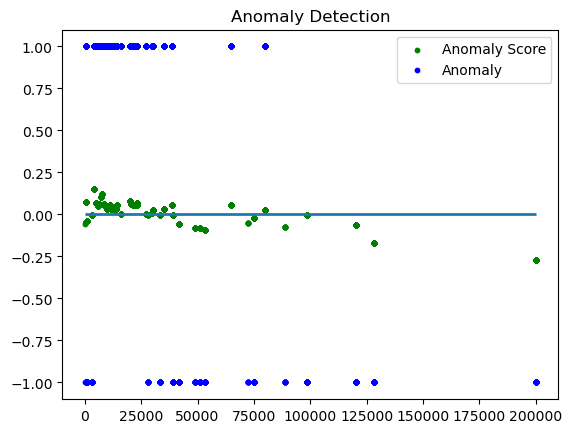

In [83]:
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly_scores'],
            color="green", s=10,
            label='Anomaly Score')
 
# plotting residual errors in test data
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly'],
            color="blue", s=10,
            label='Anomaly')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=df['Oplah'].max(), linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Anomaly Detection")
 
# method call for showing the plot
plt.show()

In [34]:
pd.value_counts(df_raw['anomaly'])

anomaly
 1    1473
-1     361
Name: count, dtype: int64

<Axes: xlabel='anomaly', ylabel='count'>

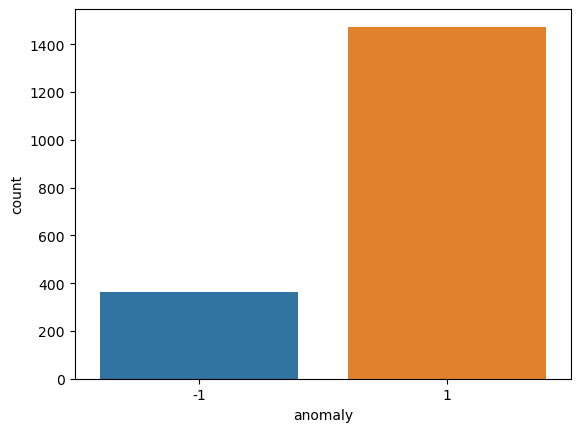

In [35]:
sns.countplot(x='anomaly', data=df_raw)

## Median Absolute Deviation

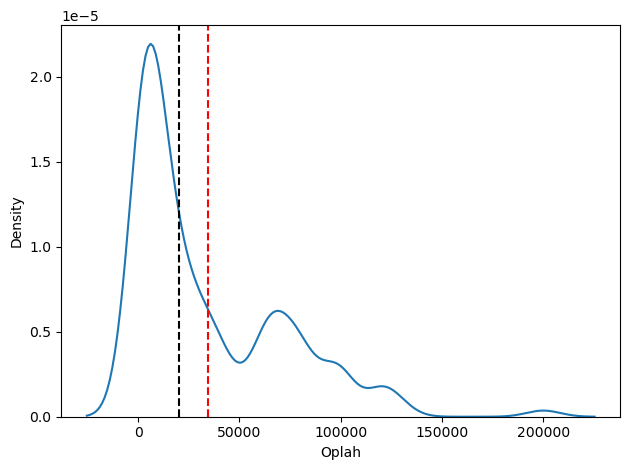

In [36]:
import seaborn as sns

sns.kdeplot(df_raw['Oplah']);
plt.grid(False)
plt.axvline(20000, 0, 1, c='black', ls='--')
plt.axvline(34530.44601962923, 0, 1, c='red', ls='--')

plt.tight_layout()

In [37]:
pd.value_counts(df_raw['Oplah'])

Oplah
4000      329
64745     174
492       125
7500      106
98399     105
80000     102
38650      63
120100     55
7000       53
20000      50
75000      46
14347      43
35000      42
4710       41
23034      32
30206      26
20965      20
23115      19
6060       18
128193     17
11178      17
27242      17
10000      15
200000     14
23185      14
10968      14
21843      13
20360      13
16187      13
41649      13
8307       12
400        12
51018      12
9852       12
29724      12
39066      12
1000       12
3000       12
53299      11
33167      11
21356      11
11768      11
12362      10
13605      10
49011      10
8370        9
5661        9
28029       7
12210       7
88962       6
11124       6
72319       5
13544       4
8340        1
0           1
Name: count, dtype: int64

In [38]:
# de = pd.read_csv("C:/Users/ASUS/Downloads/ec2_cpu_utilization_24ae8d.csv")
# de

In [39]:
# mean = np.median(de['value'])
# print(mean)

In [40]:
# df_raw['Oplah'].median()

In [41]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df_raw['Oplah'])
median = np.median(df_raw['Oplah'])
mean = np.mean(df_raw['Oplah'])

print(mad)
print(median)
print(mean)

def compute_robust_z_score(x):
    return 0.6745*(x-median)/mad

16000.0
20000.0
34530.44601962923


In [42]:
df_raw['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)
df_new['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)

df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,Trax,\,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1,-0.272161
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,1,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1,-0.272161
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,1,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1,-0.272161
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,1,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1,-0.272161
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,2,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1,7.588125


In [43]:
# df_new

In [44]:
df_raw['z-score'].value_counts()

z-score
-0.674500    329
 1.886281    174
-0.822384    125
-0.526953    106
 3.305008    105
 2.529375    102
 0.786214     63
 4.219841     55
-0.548031     53
 0.000000     50
 2.318594     46
-0.238309     43
 0.632344     42
-0.644569     41
 0.127902     32
 0.430247     26
 0.040681     20
 0.131317     19
-0.587658     18
 4.561011     17
-0.371902     17
 0.305296     17
-0.421563     15
 7.588125     14
 0.134268     14
-0.380755     14
 0.077694     13
 0.015176     13
-0.160742     13
 0.912641     13
-0.492933     12
-0.826262     12
 1.307603     12
-0.427802     12
 0.409927     12
 0.803751     12
-0.800969     12
-0.716656     12
 1.403761     11
 0.555071     11
 0.057164     11
-0.347030     11
-0.321989     10
-0.269589     10
 1.222995     10
-0.490277      9
-0.604478      9
 0.338473      7
-0.328397      7
 2.907179      6
-0.374179      6
 2.205573      5
-0.272161      4
-0.491542      1
-0.843125      1
Name: count, dtype: int64

In [45]:
df_raw['baseline'] = 1
df_new['baseline'] = 1

df_raw.loc[df_raw['z-score'] >= 3.5, 'baseline'] = -1
df_raw.loc[df_raw['z-score'] <= -3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] >= 3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] <= -3.5, 'baseline'] = -1

In [46]:
anomalies_timestamp = [
    "2024-01-02 07:01:45"
    "2024-01-03 23:45:01"
]

In [47]:
# df_raw['TanggalJamMulai1'] = pd.to_datetime(df['TanggalJamMulai1'])
# df_raw['TanggalJamSelesai1'] = pd.to_datetime(df['TanggalJamSelesai1'])
# df_raw.head()

In [48]:
df_raw['is_anomaly'] = 1

for each in anomalies_timestamp:
    df_raw.loc[df_raw['TanggalJamMulai'] == each, 'is_anomaly'] = -1
    
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1,7.588125,-1,1


In [49]:
anomaly_df = df_raw.loc[df_raw['is_anomaly'] == -1]
inlier_df = df_raw.loc[df_raw['is_anomaly'] == 1]
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,13,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.068665,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.068665,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,2100.0,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.068665,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.068665,1,-0.644569,1,1


In [50]:
# df_raw['is_anomaly'].value_counts()

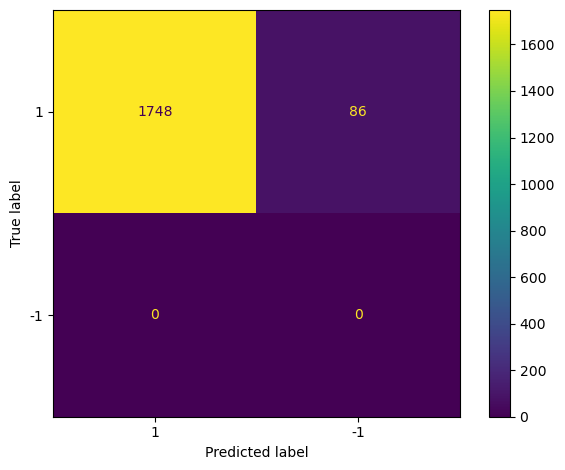

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_raw['is_anomaly'], df_raw['baseline'], labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

In [52]:
# df_raw.to_excel('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.xlsx')


In [53]:
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.csv')

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=5)

model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

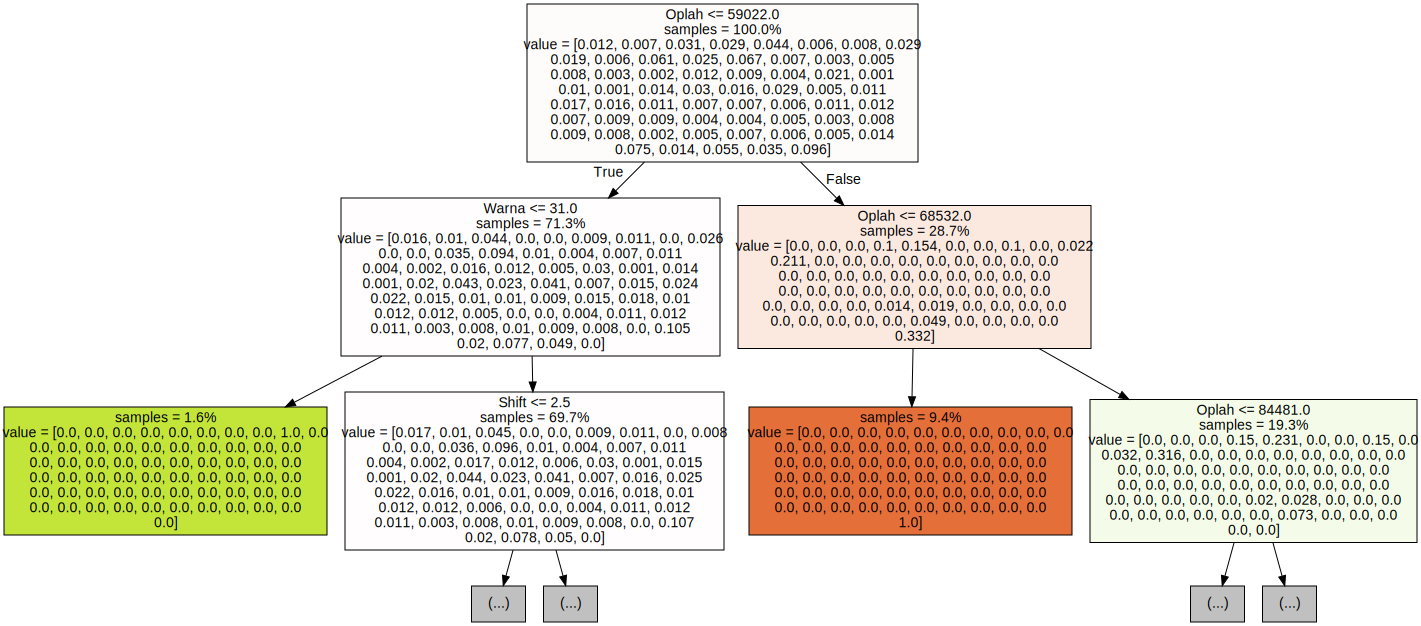

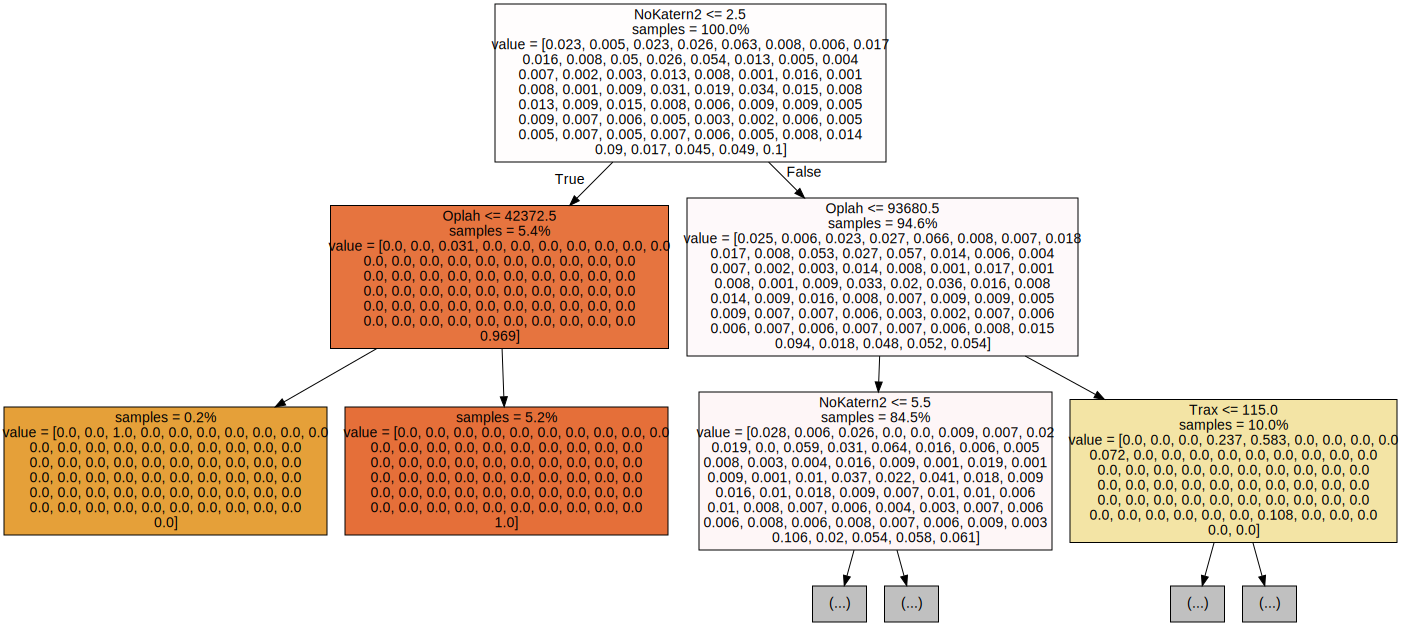

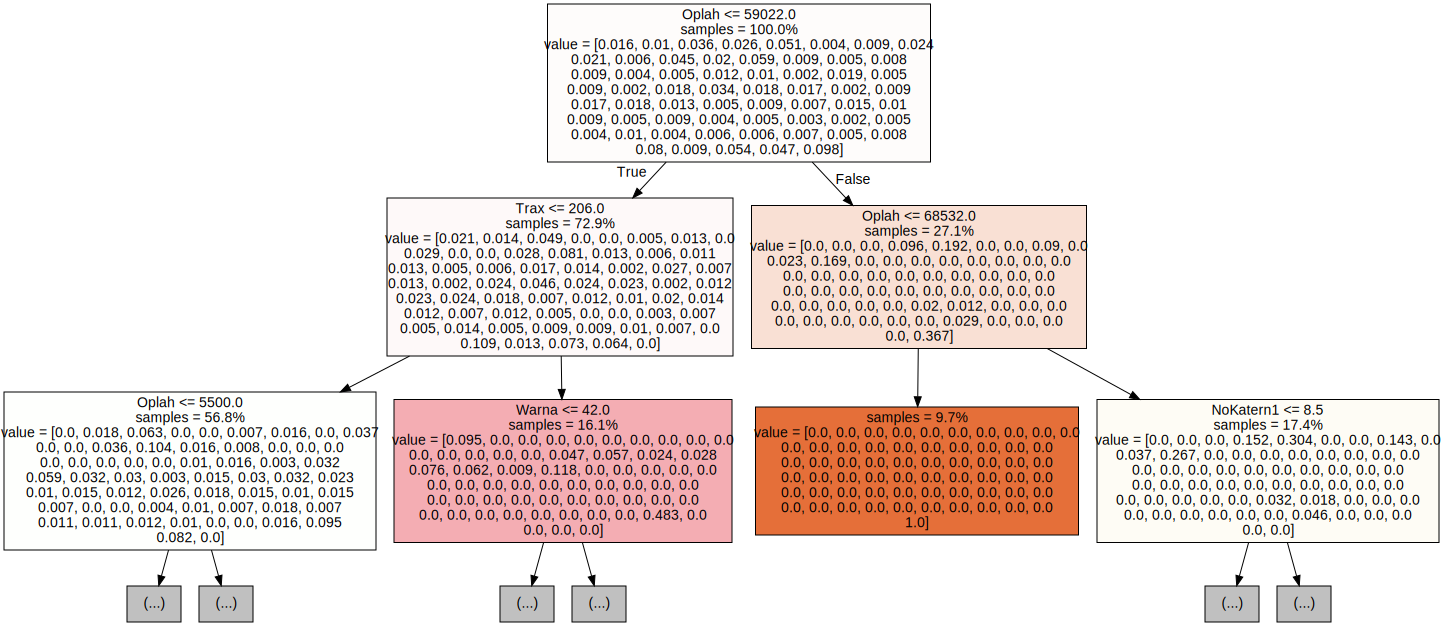

In [55]:
# Export the first three decision trees from the forest


for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

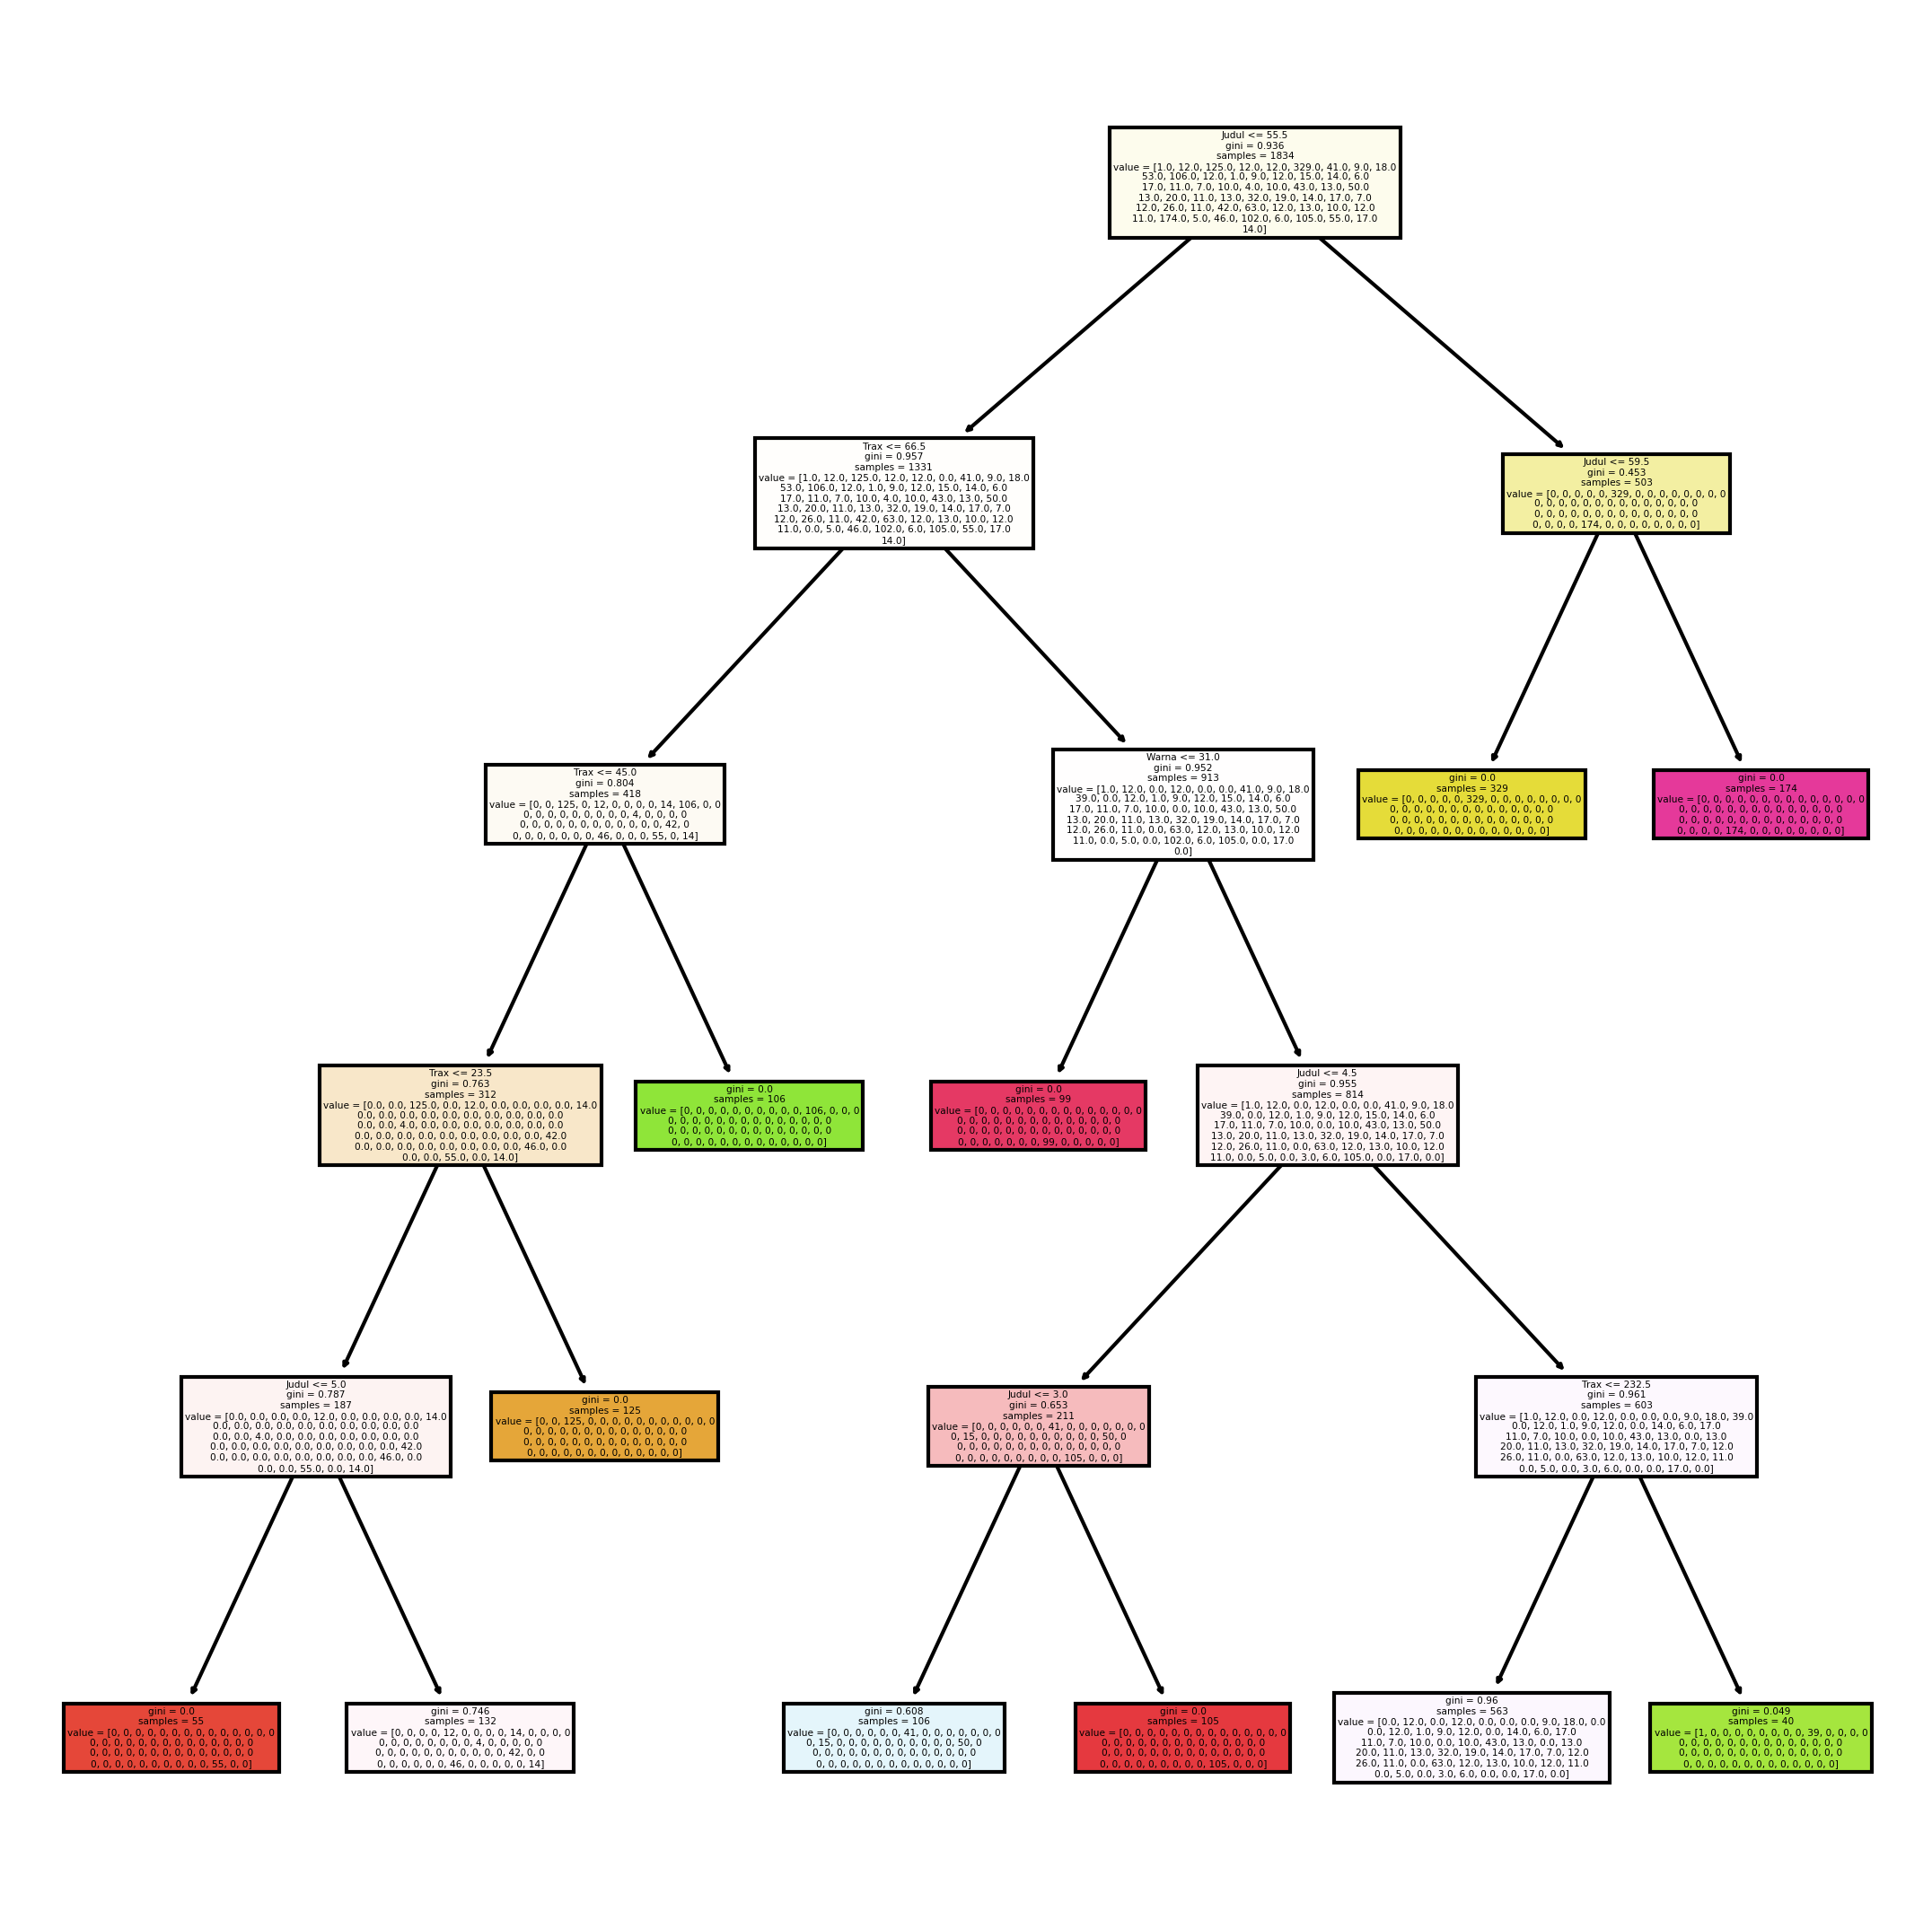

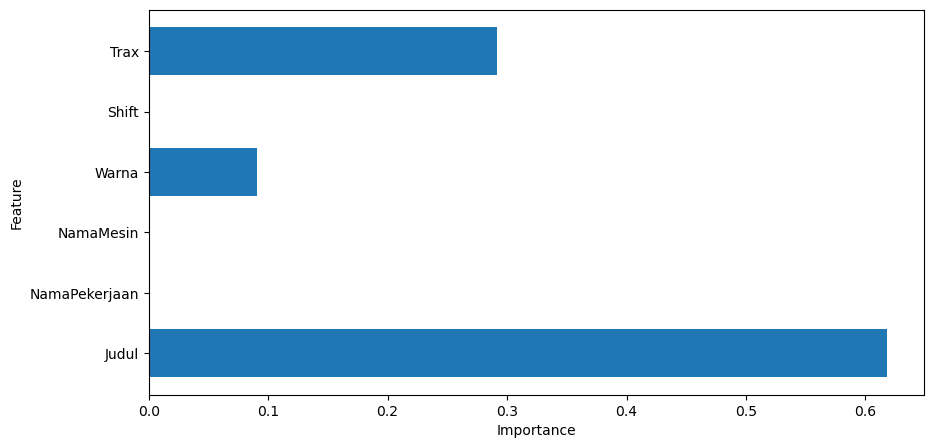

In [56]:
import sklearn.tree as tree

plt.figure(figsize=(9,9), dpi = 300)
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

plt.figure(figsize=(10,5))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [57]:
df_raw.drop(['NIK3','compute_0014','NoKatern1','NoKatern2'], axis="columns", inplace=True)

In [58]:
categorical_col = []
for column in df_raw.columns:
    if df_raw[column].dtype == object and len(df_raw[column].unique()) <= 2000:
        categorical_col.append(column)
        
df['Judul'] = df_raw.Judul.astype("category").cat.codes

categorical_col.remove('Judul')

In [59]:
categorical_col

['NamaMesin', 'NamaPekerjaan', 'JamMulai', 'JamSelesai', 'Keterangan']

In [60]:
df_raw.isnull().any()

Mesin                False
KodePekerjaan        False
NoOrder              False
Judul                False
Warna                False
Teller                True
HasilRusak            True
NamaMesin            False
NamaPekerjaan        False
compute_0017          True
compute_0018          True
compute_0019          True
compute_0020          True
compute_0021          True
compute_0022          True
compute_0023          True
compute_0024          True
Produksi             False
compute_0026         False
compute_0027         False
compute_0028          True
compute_0029          True
TanggalMulai         False
TanggalSelesai       False
Shift                False
JamMulai             False
JamSelesai           False
Oplah                False
Keterangan            True
NIK1                  True
NIK2                 False
NIK4                  True
NIK5                  True
NIK6                  True
Unnamed: 40           True
Trax                 False
\                     True
U

In [61]:
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,Warna,Teller,HasilRusak,NamaMesin,NamaPekerjaan,compute_0017,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Input NIK,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Gang.Unit Pembasah,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,20,NaN,NaN,KBA,Input No. Order,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Persiapan,NaN,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.068665,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Produksi/cetak,NaN,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.068665,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,2100.0,NaN,KBA,Input Teller Sementara,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.068665,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Gang.Gosok Blanket,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.068665,1,-0.644569,1,1


In [62]:
from sklearn.preprocessing import LabelEncoder

df_raw_new = df_raw.select_dtypes(exclude=['object'])
# df_raw_new = df_raw_new.drop(columns=['compute_0014'])
label = LabelEncoder()
for column in df_raw_new:
    df_raw_new[column] = label.fit_transform(df_raw_new[column])

In [63]:
# categorical_col
# for col in df_raw_new.columns[:]:
#     print(col)
#     print(df_raw_new[col].unique())
#     print()

In [64]:
# df_raw[column]wwwwwwwwwwwww[qd ]

In [65]:
from sklearn.model_selection import train_test_split

X = df_new.drop('Judul', axis=1)
y = df_raw.Judul

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [67]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.12%
_______________________________________________
CLASSIFICATION REPORT:
           AL HAROMAIN ED. FEBRUARI 2024  AL-QUR'AN GARIS AR RAHMAN B5  \
precision                            1.0                      1.000000   
recall                               1.0                      0.142857   
f1-score                             1.0                      0.250000   
support                             31.0                     14.000000   

           AL-QUR'AN KHAT ASY-SYIFA GARIS A4  ALFA MART DC SURABAYA ED. 02  \
precision                                1.0                           1.0   
recall                                   1.0                           1.0   
f1-score                                 1.0                           1.0   
support                                 39.0                          43.0   

           ALFA MART DC SURABAYA ED. 03  \
precision                           1.0   
recall                              1.0   
f

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\s

In [68]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# params = {
#     "criterion":("gini", "entropy"), 
#     "splitter":("best", "random"), 
#     "max_depth":(list(range(1, 20))), 
#     "min_samples_split":[2, 3, 4], 
#     "min_samples_leaf":list(range(1, 20)), 
# }


# tree_clf = DecisionTreeClassifier(random_state=42)
# tree_cv = GridSearchCV(
#     tree_clf, 
#     params, 
#     scoring="f1", 
#     n_jobs=-1, 
#     verbose=1, 
#     cv=5
# )

# tree_cv.fit(X_train, y_train)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

# tree_clf = DecisionTreeClassifier(**best_params)
# tree_clf.fit(X_train, y_train)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [69]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df_new.columns)
features.remove("Judul")

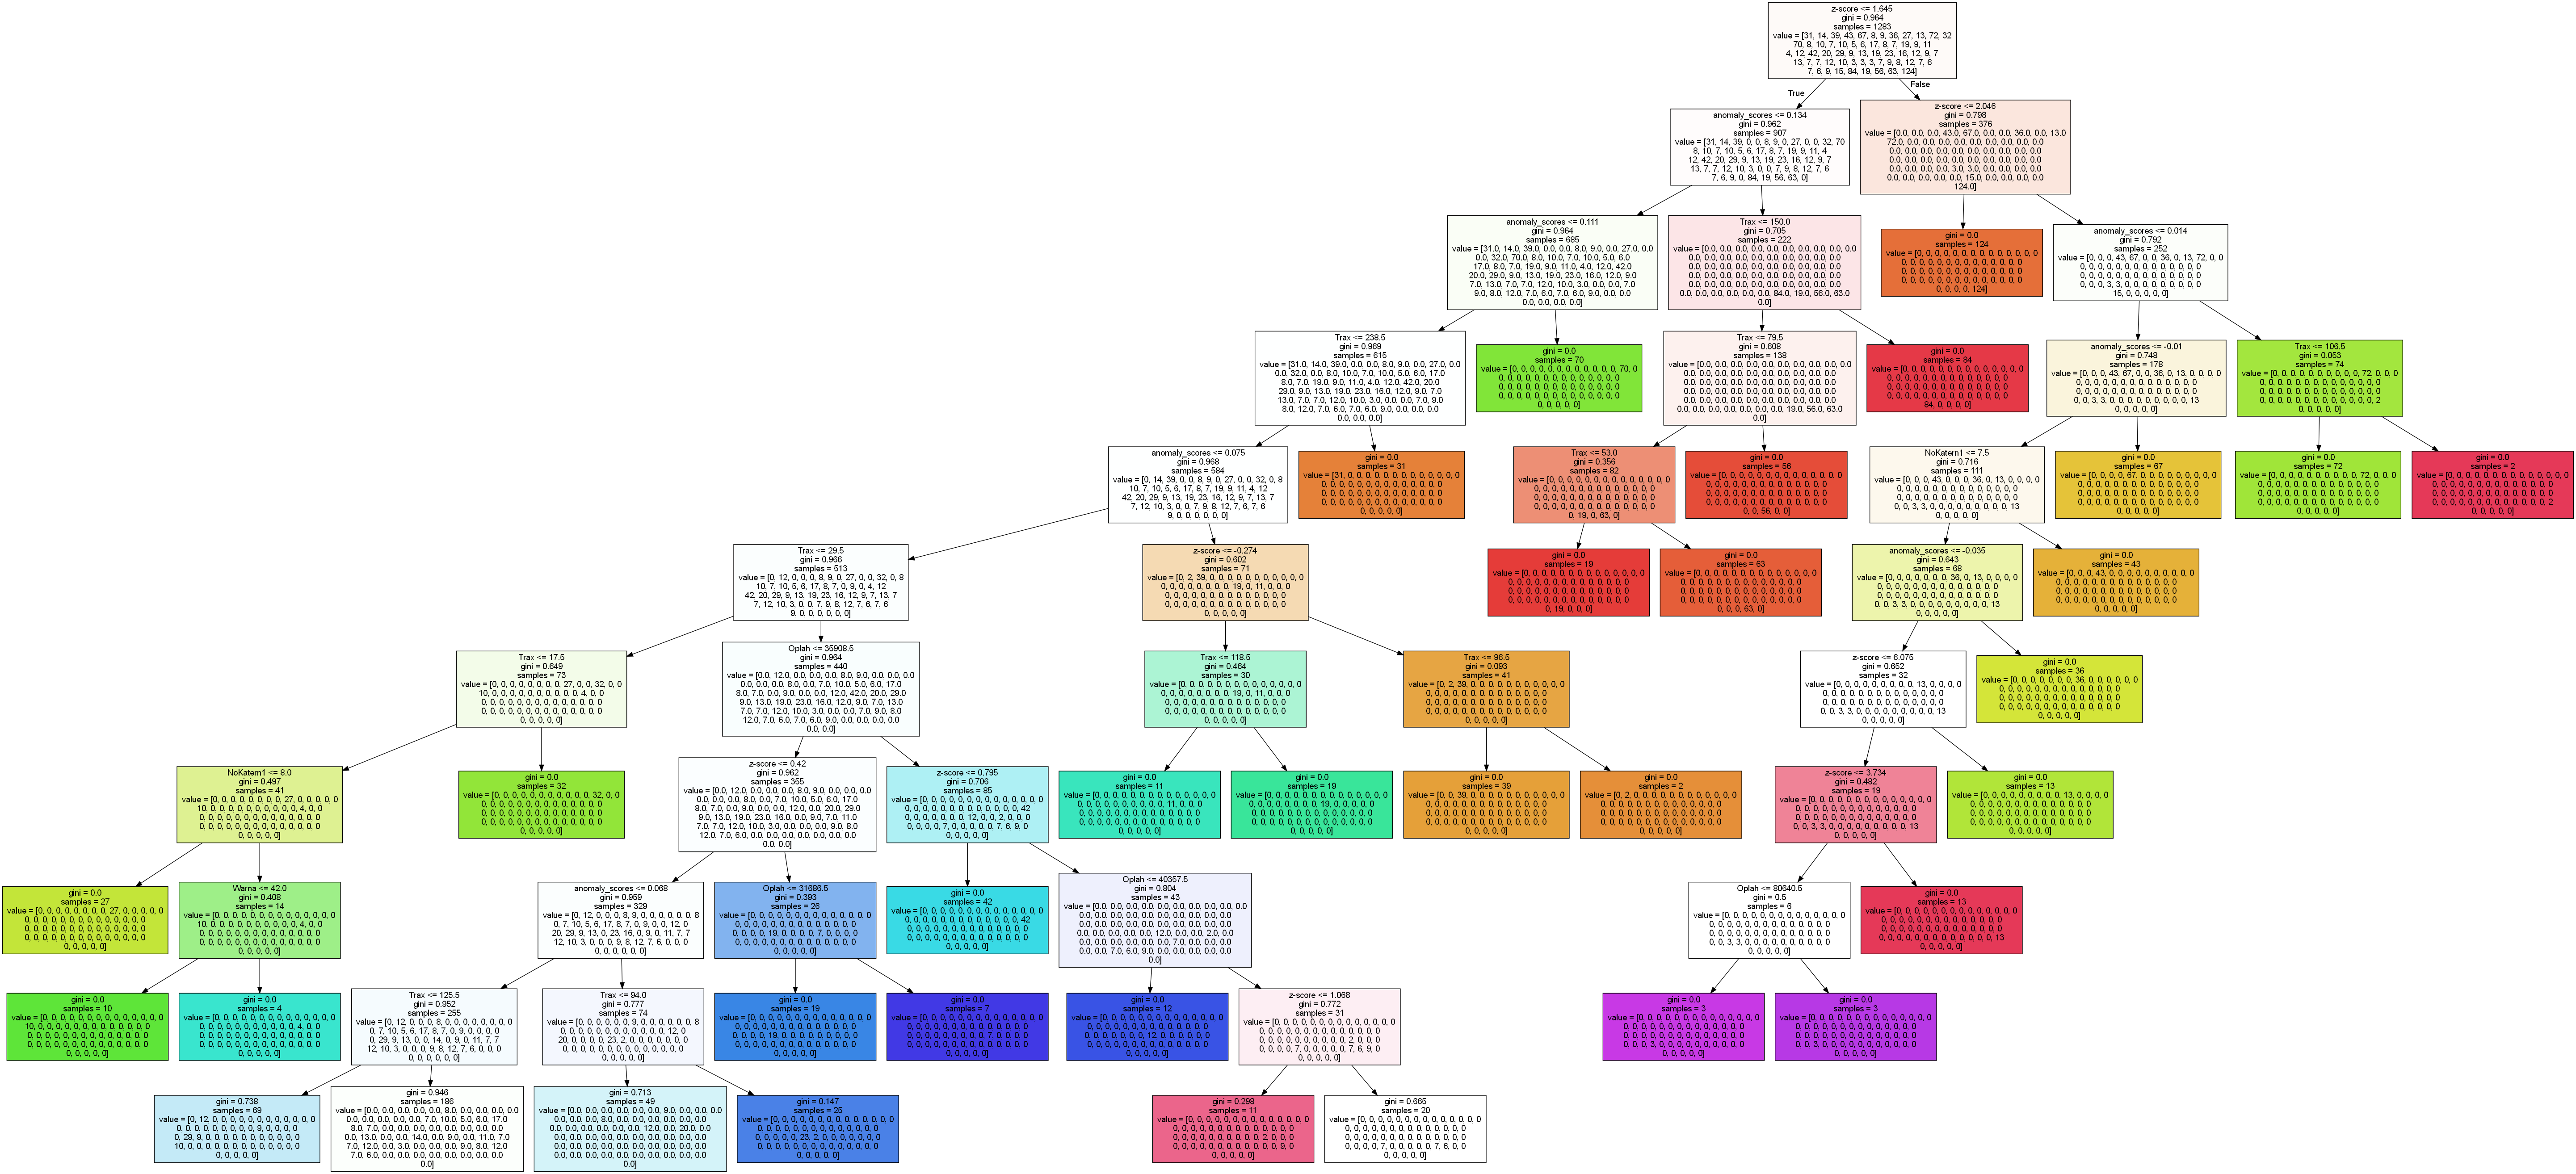

In [70]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
# graph[0].write_png('D:/bckup hdd lama/Kuliah/Semester 6/tree.png')

In [71]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [72]:
features

['Mesin',
 'Warna',
 'compute_0017',
 'compute_0018',
 'compute_0019',
 'compute_0020',
 'compute_0021',
 'compute_0022',
 'compute_0023',
 'compute_0024',
 'compute_0026',
 'compute_0027',
 'compute_0028',
 'compute_0029',
 'Shift',
 'Oplah',
 'Trax',
 '\\',
 'NoKatern1',
 'NoKatern2',
 'NamaPekerjaan',
 'NamaMesin',
 'anomaly_scores',
 'anomaly',
 'z-score',
 'baseline']

In [73]:
df_raw.rename(columns={'z-score': 'z_score'}, inplace=True)
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,Warna,Teller,HasilRusak,NamaMesin,NamaPekerjaan,compute_0017,...,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z_score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Input NIK,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.028323,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Gang.Unit Pembasah,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.028323,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.028323,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.028323,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,20,NaN,NaN,KBA,Input No. Order,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.268329,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Persiapan,NaN,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.068665,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Produksi/cetak,NaN,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.068665,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,2100.0,NaN,KBA,Input Teller Sementara,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.068665,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Gang.Gosok Blanket,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.068665,1,-0.644569,1,1


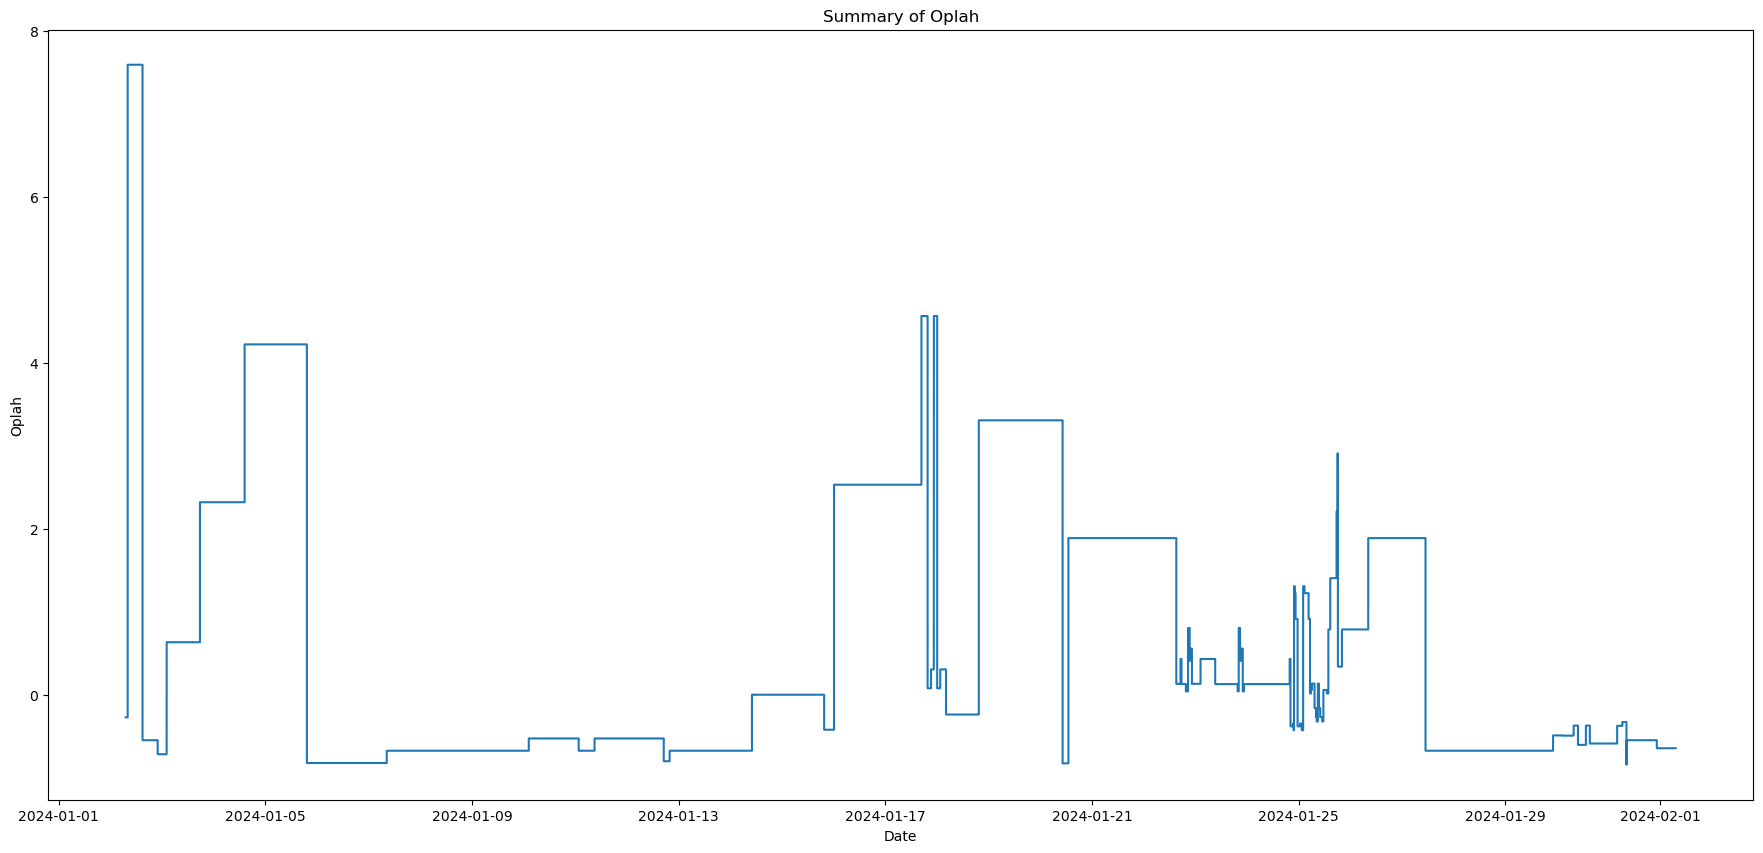

In [74]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.z_score)
plt.title("Summary of Oplah")
plt.xlabel("Date")
plt.ylabel("Oplah")
plt.show()

In [75]:
# df_raw.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_proc2.xlsx")

In [76]:
df_raw.fillna(0,inplace=True)
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc2.csv')

In [77]:
# # df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
# plt.figure(figsize=(22,10))
# plt.plot(df_raw.TanggalJamSelesai,df_raw.Oplah)
# plt.title("Summary of Oplah")
# plt.xlabel("Date")
# plt.ylabel("Oplah")
# plt.show()

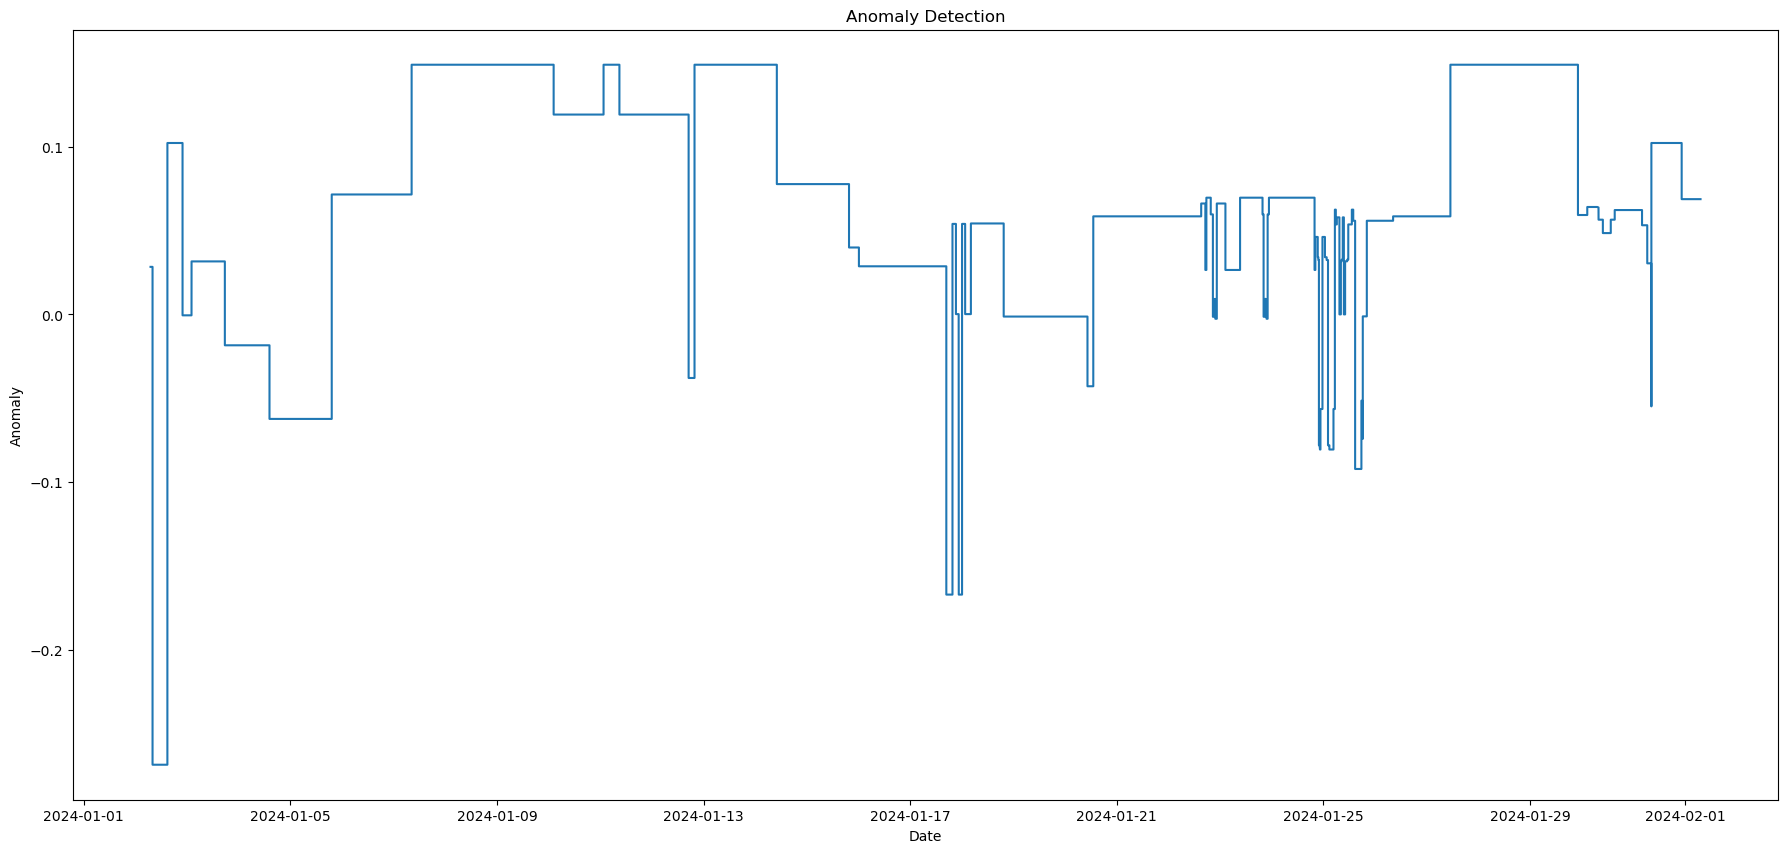

In [78]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.anomaly_scores)
plt.title("Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.show()

In [79]:
df_raw['Produksi'].sum()

1834

In [80]:
# df_raw[df_raw.TanggalJamMulai=='2024-01-02 07:01:45']

In [81]:
# # date_range = df_raw.set_index('TanggalJamMulai')
# df_raw['TanggalJamMulai'].loc['2024-01-02 07:01:45':'2024-05-02 23:23:18']
# date_range

In [82]:
# start_date = '2024-01-02 07:01:45'
# end_date = '2024-05-02 23:23:18'
# mask = (df_raw['TanggalJamMulai'] > start_date) & (df_raw['TanggalJamMulai'] <= end_date) 
  
# dff = dff.loc[mask] 
# display(dff) 